# Using VGG16 Pre-Trained Model for NFL Pass or Run Play Image Classification

In [12]:
import numpy as np
import os
import time
from vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
#from imagenet_utils import preprocess_input, decode_predictions
#from keras.applications.imagenet_utils import preprocess_input
from imagenet_utils import decode_predictions
from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [13]:
# Loading the training data
PATH = os.getcwd()
# Define data path
data_path = PATH + '/validation'
data_dir_list = os.listdir(data_path)

data_dir_list = data_dir_list[-2:]

img_data_list=[]

for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        if img =='.DS_Store':
            pass
        else:
            img_path = data_path + '/'+ dataset + '/'+ img
            img = image.load_img(img_path, target_size=(224, 224))
            x = image.img_to_array(img)
            x = np.expand_dims(x, axis=0)
            x = preprocess_input(x)
            print('Input image shape:', x.shape)
            img_data_list.append(x)

Loaded the images of dataset-Pass

Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Loaded the images of dataset-Run

Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)


In [34]:
img_data = np.array(img_data_list)
img_data=np.rollaxis(img_data,1,0)
img_data=img_data[0]

# Define the number of classes
num_classes = 2
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:10]=0
labels[11:20]=1

names = ['Pass','Run']

# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
img,label_list = shuffle(img_data, labels, random_state=2)

print(label_list)

[1 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0]


In [38]:
image_input = Input(shape=(224, 224, 3))

#model = VGG16(input_tensor=image_input, include_top=True,weights='imagenet')
#last_layer = model.get_layer('fc2').output
#out = Dense(num_classes, activation='softmax', name='output')(last_layer)
#custom_vgg_model = Model(image_input, out)


model = load_model('/Users/jessedrotar/Desktop/Transfer-Learning-in-keras---custom-data-master/trained_models/best.weights_Adamv2.hdf5')

model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['binary_accuracy'])
#custom_vgg_model.load_weights('/Users/jessedrotar/Desktop/Transfer-Learning-in-keras---custom-data-master/trained_models/best.weights_Adamv2.hdf5')


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [45]:
predictions =[]
for img in img_data_list:
    predictions.append(model.predict(img).argmax())


Confusion matrix, without normalization
[[5 5]
 [3 7]]


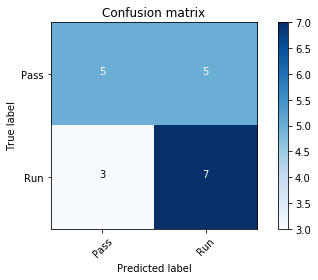

In [44]:
%matplotlib inline

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = ['Pass', 'Run']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(label_list, predictions)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')

plt.show()

Recall = TP/TP + FN

Recall = 62.5%

Precision = TP/TP + FP

Precisino = 50%